In [145]:
from surprisal import AutoHuggingFaceModel
from collections import Counter
from wordfreq import word_frequency
from wordfreq import zipf_frequency
from scipy import stats

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import replicate
import tqdm
from tqdm import tqdm
import time
import string


warnings.filterwarnings('ignore')

In [146]:
ls 

README.md            gpt4v_temp_1125.pkl  project.ipynb
data/                output.png
eval.ipynb           plot/


# Replicate API

Minigpt-4 is hosted on [replicate](https://replicate.com/daanelson/minigpt-4/versions/b96a2f33cc8e4b0aa23eacfce731b9c41a7d9466d9ed4e167375587b54db9423), with an API available for deployment.

| Parameter          | Interpretation                                                                                                                        | Default | Min  | Max |
|--------------------|---------------------------------------------------------------------------------------------------------------------------------------|---------|------|-----|
| num_beams          | number of beams for beam search decoding                                                                                              | 3       | 1    | 10  |
| temperature        | temperature for generating tokens, lower = more predictable results                                                                   | 1    | 0.01 | 2   |
| top_p              | sample from the top p percent most likely tokens                                                                                      | 0.9     | 0    | 1   |
| repetition_penalty | penalty for repeated words in generated text; 1 is no penalty, values greater than 1 discourage repetition, less than 1 encourage it. | 1       | 0.01 | 5   |
| max_new_tokens     | maximum number of new tokens to generate                                                                                              | 3000    | 1    |     |
| max_length         | total length of prompt and output in tokens                                                                                           | 4000    | 1    |     |                                                                                             

In [147]:
cred_path = "../../../Desktop/others/anlp_project/credential.txt"
image_path = "data/pic.png"

In [148]:
with open(cred_path, encoding = 'utf-8') as f:
  key = f.readline().strip()

os.environ["REPLICATE_API_TOKEN"] = key

# Retrieve descriptions from MiniGPT-4

In [ ]:
def get_description(iteration, beams, temp, top_p, repetition):
  col = []
  val = []

  prompt = "Please tell me everything you see going on in this picture."

  for i in np.arange(0, iteration, 1):
    col.append(i)
    output = replicate.run("daanelson/minigpt-4:b96a2f33cc8e4b0aa23eacfce731b9c41a7d9466d9ed4e167375587b54db9423",
                           input={"image": open(image_path, "rb"),
                                  "prompt": prompt,
                                  "num_beams": beams,
                                  "temperature": temp,
                                  "top_p": top_p,
                                  "repetition_penalty": repetition})
    val.append(output)

  data = {"iteration" : col,
          "num_beam" : [beams] * len(col),
          "temperature" : [temp] * len(col),
          "top_p" : [top_p] * len(col),
          "description": val
      }

  df = pd.DataFrame(data)

  return df

In [ ]:
# def get_description_df(param_list, iteration, beams, top_p, repetition):
#   df = pd.DataFrame()
#   for i in tqdm(param_list):
#     #df = df.extend(get_description(iteration, beams, i, top_p, repetition))
#     new = get_description(iteration, beams, i, top_p, repetition)
#     df = pd.concat([df, new])
#   df = df.reset_index(drop=True)

#   return df

In [ ]:
def get_description_df(param_list, iteration, top_p, temperature, repetition):
  df = pd.DataFrame()
  for i in tqdm(param_list):
    #df = df.extend(get_description(iteration, beams, i, top_p, repetition))
    #get_description(iteration, beams, temp, top_p, repetition)
    new = get_description(iteration, i, temperature, top_p, repetition)
    df = pd.concat([df, new])
  df = df.reset_index(drop=True)

  return df

In [ ]:
# temps = np.arange(0.01, 2.002, 0.002)
# tempsplit = np.array_split(temps, 20)

In [ ]:
# for temp in tempsplit:
#     df_continue = get_description_df(param_list = temp,
#                    iteration = 1,
#                    beams = 1,
#                    top_p = 0.9,
#                    repetition = 1)
#     temp_name = str(np.round(temp[-1], decimals=3))
#     df_continue.to_pickle('data/temp_data/df_'+temp_name+'.pkl')

In [ ]:
# topp = np.arange(0.002, 1.001, 0.001)
# topplist = np.array_split(topp, 20)

In [ ]:
# topplist

In [ ]:
# for p in topplist:
#     df_continue = get_description_df(param_list = p,
#                    iteration = 1,
#                    beams = 1,
#                    temperature = 1,
#                    repetition = 1)
#     p_name = str(np.round(p[-1], decimals=3))
#     df_continue.to_pickle('data/topp_data/df_'+p_name+'.pkl')

In [ ]:
beam = np.arange(1, 11, 1)
beamlist = np.array_split(beam, 1)
beamlist
beamlist

In [ ]:
for beam in beamlist:
    df_continue = get_description_df(param_list = beam,
                   iteration = 1,
                   top_p = 0.9,
                   temperature = 1,
                   repetition = 1)
    beam_name = str(np.round(beam[-1], decimals=3))
    df_continue.to_pickle('data/beam_data/df_'+beam_name+'.pkl')

In [ ]:
df = pd.DataFrame()
for beam in beamlist:
    beam = str(np.round(beam[-1], decimals=3))
    p_df = pd.read_pickle('data/beam_data/df_'+beam+'.pkl')
    df = pd.concat([df, p_df])
    
df = df.reset_index(drop=True)
df


In [ ]:
# df['description'].unique()

In [ ]:
df.to_pickle("data/minigpt_topp_1120.pkl")

In [ ]:
# df_continue = get_description_df(param_list = np.arange(0.01, 2.002, 0.002),
#                    iteration = 1,
#                    beams = 1,
#                    top_p = 0.9,
#                    repetition = 1)

In [ ]:
df_continue

In [ ]:
df_continue.to_pickle('df1102.pkl')

In [ ]:
# temps = np.arange(0.001, 1.001, 0.001)
# tempsplit = np.array_split(temps, 200)

folder_path = 'data/temp_data_4v/'
dfs = []

for filename in os.listdir(folder_path):
    if filename.endswith('.pkl'):  
        file_path = os.path.join(folder_path, filename)
        df = pd.read_pickle(file_path)  
        dfs.append(df)
        
df_temp_4v = pd.concat(dfs, ignore_index=True)

In [ ]:
# df_temp_4v['model'] = ['GPT-4V'] * df_temp_4v.shape[0]
df_temp_4v

# Text analysis

## Function

In [ ]:
# remove punct and tokenize
def tokenize(sent):
    return [w.strip(string.punctuation) for w in sent.lower().split()]

In [ ]:
# token-type ratio
def word_counts(sent):
    counts = Counter()
    tokens = tokenize(sent)
    for token in tokens:
        counts[token] += 1
    #return counts, len(counts), sum(counts.values()), len(counts)/sum(counts.values())
    return len(counts)/sum(counts.values())

In [ ]:
# average word frequency
# https://pypi.org/project/wordfreq/
def avg_word_freq(sent):
    tokens = tokenize(sent)
    
    freqs = [zipf_frequency(token, 'en', wordlist='large', minimum=-1) for token in tokens]
    # skip token not found
    avg_freq = np.mean([freq for freq in freqs if freq != -1])

    # if -1 in freqs:
    #     return 'NA in list'
    # else:
    #     return np.mean(freqs)

    return avg_freq

In [ ]:
# get surprisal for each word
m = AutoHuggingFaceModel.from_pretrained('gpt2')

def get_word_surp(sent):
    # words = []
    # surps = []
    words = [word for word, surp in m.surprise(sent)[0]]
    surps = [surp for word, surp in m.surprise(sent)[0]]
    
    return pd.Series([words, surps])

In [ ]:
# remove outliers
def remove_outliers(df, cols):
    for col in cols: 
        z = np.abs(stats.zscore(df[col]))
        # print(np.where(z > 2.5))
        print(f"the number of outlier for the column {col} is {len(np.where(z > 2.5)[0])}")
        df = df.drop(np.where(z > 2.5)[0]).reset_index(drop=True)
    
    # newdf = df.reset_index(drop=True)
    return df

### MiniGPT-4

In [ ]:
df_temp = pd.read_pickle("data/minigpt_temp_1103.pkl")
df_temp['id'] = df_temp.index + 1
df_temp['model'] = ['MiniGPT-4'] * df_temp.shape[0]
print(df_temp.shape)
print(len(df_temp.temperature.unique()))
df_temp.head()

In [ ]:
df_topp = pd.read_pickle("data/minigpt_topp_1120.pkl")
df_topp['id'] = df_topp.index + 1
df_topp['model'] = ['MiniGPT-4'] * df_topp.shape[0]
print(df_topp.shape)
df_topp.head()

In [ ]:
# df['ttr'] = df['description'].apply(word_counts)
# df['avg_freq'] = df['description'].apply(avg_word_freq)
# df.head()

In [ ]:
# df[['words', 'surps']] = df['description'].apply(get_word_surp)
# df['uid'] = df['surps'].apply(np.var)
# df['avg_info'] = df['surps'].apply(np.mean)

In [ ]:
# df.to_pickle("data/minigpt_temp_1103.pkl")
# df.to_pickle("data/minigpt_topp_1120.pkl")

In [ ]:
cleandf_temp = remove_outliers(df_temp, ['uid', 'avg_freq', 'avg_info'])
cleandf_topp = remove_outliers(df_topp, ['uid', 'avg_freq', 'avg_info'])

In [ ]:
# cleandf_minigpt =  pd.concat([cleandf_temp, cleandf_temp]).reset_index(drop=True)
cleandf_minigpt.to_pickle("data/clean_minigpt.pkl")

#### Utterance-level

In [ ]:
df['sentences'] = df['description'].str.split('.')
df

In [ ]:
df.iloc[99,:]['sentences']

In [ ]:
fulldf = df.explode('sentences').reset_index(drop=True)
fulldf

In [ ]:
fulldf.iloc[545,:]

In [ ]:
fulldf = fulldf.loc[fulldf['sentences'] != ''].reset_index(drop=True)
fulldf

In [ ]:
get_word_surp(fulldf['sentences'][0])

In [ ]:
fulldf[['words', 'surps']] = fulldf['sentences'].apply(get_word_surp)

In [ ]:
fulldf

In [ ]:
fulldf['uid'] = fulldf['surps'].apply(np.var)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
fulldf.head()

In [ ]:
sns.histplot(data=fulldf, x='uid')

In [ ]:
sns.scatterplot(data=fulldf, x='temperature', y='uid')
import matplotlib.pyplot as plt

### GPT-4V

In [ ]:
data_path = "data/gpt_1101.txt"

In [ ]:
# with open(data_path, encoding = 'utf-8') as f:
#     description = []
#     for line in f:
#         description.append(line)

# gptdf = pd.DataFrame(description, columns=["description"])
# gptdf['id'] = gptdf.index
# gptdf['model'] = ['GPT-4(V)'] * gptdf.shape[0]

In [ ]:
# gptdf.head()
# print(gptdf.shape)

In [ ]:
# gptdf['ttr'] = gptdf['description'].apply(word_counts)
# gptdf['avg_freq'] = gptdf['description'].apply(avg_word_freq)
# gptdf.head()

In [ ]:
# gptdf[['words', 'surps']] = gptdf['description'].apply(get_word_surp)
# gptdf['uid'] = gptdf['surps'].apply(np.var)
# gptdf['avg_info'] = gptdf['surps'].apply(np.mean)

# gptdf.to_pickle("data/gpt_1103.pkl")

In [ ]:
chatgpt = pd.read_pickle("data/gpt_1103.pkl")
chatgpt['model'] = ['ChatGPT'] * chatgpt.shape[0]
chatgpt

In [ ]:
cleangpt = remove_outliers(chatgpt, ['uid', 'avg_freq', 'avg_info'])

In [ ]:
# df_temp_4v['ttr'] = df_temp_4v['description'].apply(word_counts)
# df_temp_4v['avg_freq'] = df_temp_4v['description'].apply(avg_word_freq)

# df_temp_4v[['words', 'surps']] = df_temp_4v['description'].apply(get_word_surp)
# df_temp_4v['uid'] = df_temp_4v['surps'].apply(np.var)
# df_temp_4v['avg_info'] = df_temp_4v['surps'].apply(np.mean)

# df_temp_4v.to_pickle("gpt4v_temp_1125.pkl")

In [ ]:
gptdf_gpt4v = pd.read_pickle("gpt4v_temp_1125.pkl")
cleangpt_4v = remove_outliers(gptdf_gpt4v, ['uid', 'avg_freq', 'avg_info'])

In [ ]:
alldf_gpt = pd.concat([cleangpt, cleangpt_4v]).reset_index(drop=True)
alldf_gpt

In [ ]:
alldf_gpt['description'][1]

In [ ]:
subset = ['description', 'ttr', 'avg_freq', 'avg_info', 'uid', 'model']

alldf =  pd.concat([alldf_gpt[subset], cleandf_minigpt[subset]]).reset_index(drop=True)

In [ ]:
alldf.to_pickle("data/clean_alldf.pkl")

# Visualization

## Viz setting

In [ ]:
# color_pal = ["#eb8034", "#febf98", "#f1f1f1", "#96c09b", "#338f4a"]
sns.set_style("white")
# color_pal = ['#00429d', '#4771b2', '#73a2c6', '#a5d5d8', '#ffffe0', '#ffbcaf', '#f4777f', '#cf3759', '#93003a']
color_pal = ['#00429d', '#4771b2', '#73a2c6', '#a5d5d8', '#ffffe0', '#f4d9bc', '#e7b299', '#d98c79', '#da5372']
# color_pal = ["#157361", "#91b8ad", "#ffffff", "#ffb68c", "#f56b16"]
sns.set_palette(color_pal)
sns.color_palette(color_pal)

## Viz

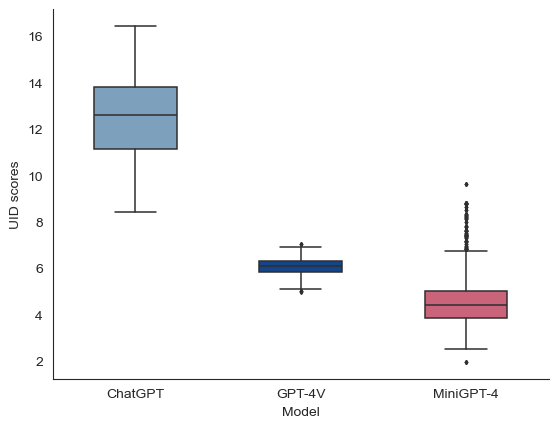

In [149]:
palette = {'GPT-4V': '#00429d', 
           'ChatGPT': '#73a2c6',
           'MiniGPT-4': '#da5372'}

sns.boxplot(alldf, x='model', y='uid', palette=palette, width=0.5, whis=1.5, linewidth=1.1, fliersize=2)
sns.despine()
plt.xlabel("Model")
plt.ylabel("UID scores");

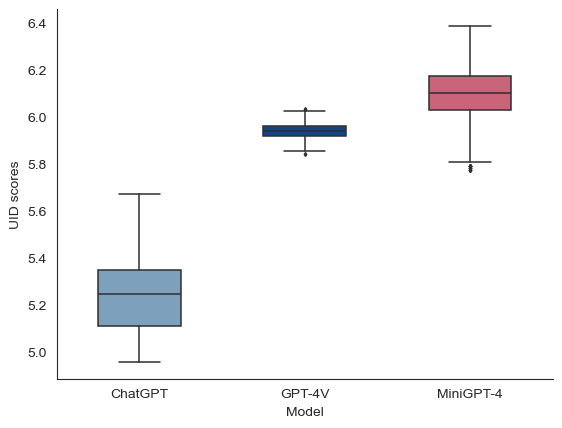

In [153]:
palette = {'GPT-4V': '#00429d', 
           'ChatGPT': '#73a2c6',
           'MiniGPT-4': '#da5372'}

sns.boxplot(alldf, x='model', y='avg_freq', palette=palette, width=0.5, whis=1.5, linewidth=1.1, fliersize=2)
sns.despine()
plt.xlabel("Model")
plt.ylabel("UID scores");

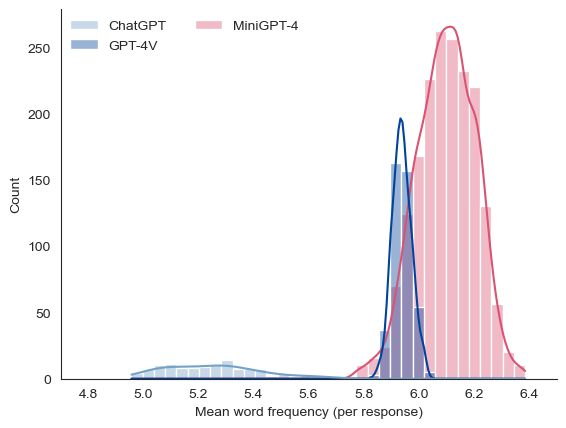

In [150]:
palette = {'GPT-4V': '#00429d', 
           'ChatGPT': '#73a2c6',
           'MiniGPT-4': '#da5372'}

kwargs = {'alpha':0.4}
ax = sns.histplot(data=alldf, x='avg_freq', hue='model', palette=palette, **kwargs, bins=35, kde=True)
sns.despine()
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.25, 0.85), ncol=2, title=None, frameon=False)

plt.xlim(4.7, 6.5)
plt.xlabel("Mean word frequency (per response)")
plt.ylabel("Count");
# plt.savefig('plot/hist-freq.png')

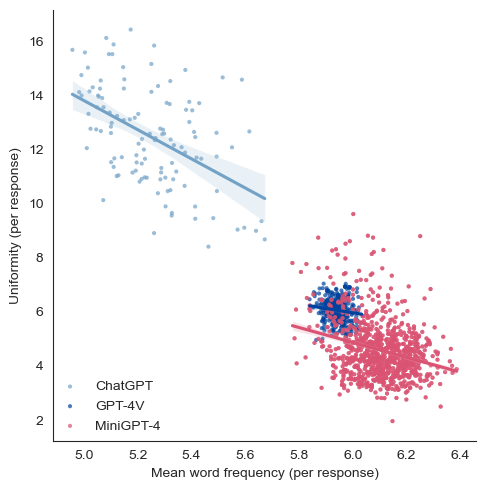

In [151]:
palette = {'GPT-4V': '#00429d', 
           'ChatGPT': '#73a2c6',
           'MiniGPT-4': '#da5372'}

ax = sns.lmplot(data=alldf, x='avg_freq', y='uid', hue='model', palette=palette, markers='.', scatter_kws={'alpha':0.7, 'edgecolors':'none'})
sns.despine()
sns.move_legend(
    ax, "lower left",
    bbox_to_anchor=(0.1, 0.1), ncol=1, title=None, frameon=False)

plt.xlabel("Mean word frequency (per response)")
plt.ylabel("Uniformity (per response)");
# plt.savefig('plot/freq-uid.png')

Text(0, 0.5, 'Count')

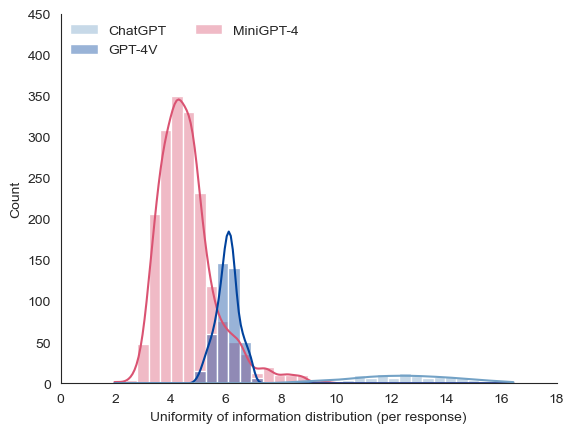

In [152]:
palette = {'GPT-4V': '#00429d', 
           'ChatGPT': '#73a2c6',
           'MiniGPT-4': '#da5372'}

kwargs = {'alpha':0.4}
ax = sns.histplot(data=alldf, x='uid', hue='model', palette=palette, **kwargs, bins=35, kde=True)
sns.despine()
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.25, 0.85), ncol=2, title=None, frameon=False)

plt.xlim(0, 18)
plt.ylim(0, 450)
plt.xlabel("Uniformity of information distribution (per response)")
plt.ylabel("Count")

In [ ]:
# varying temperature
sns.regplot(data=df, x="temperature", y="uid", order=2, marker='.', scatter_kws={'alpha':0.7, 'edgecolors': 'none'}, line_kws={'color':'#da5372'})
sns.despine()
plt.xlabel("Temperature")
plt.ylabel("Uniformity of information distribution (per response)")
plt.ylim(0, 18);
plt.savefig('plot/minigpt-temp-scatter.png')

In [ ]:
# varying p for top p 
sns.regplot(data=df, x="top_p", y="uid", order=3, marker='.', scatter_kws={'alpha':0.7, 'edgecolors': 'none'}, line_kws={'color':'#da5372'})
sns.despine()
plt.xlabel("Top P")
plt.ylabel("Uniformity of information distribution (per response)")
plt.ylim(0, 18);
# plt.savefig('plot/minigpt-temp-scatter.png')

In [ ]:
# varying temp for GPT-4V
sns.regplot(data=clean_temp_4v, x="temperature", y="uid", order=3, marker='.', scatter_kws={'alpha':0.7, 'edgecolors': 'none'}, line_kws={'color':'#da5372'})
sns.despine()
plt.xlabel("Temperature")
plt.ylabel("Uniformity of information distribution (per response)")
plt.xlim(0, 0.5)
plt.ylim(0, 18);
# plt.savefig('plot/minigpt-temp-scatter.png')

In [ ]:
palette = {'GPT-4(V)': '#00429d', 
           'MiniGPT-4': '#da5372'}

kwargs = {'alpha':0.4}
ax = sns.histplot(data=alldf, x='avg_freq', hue='model', palette=palette, **kwargs, bins=35, kde=True)
sns.despine()
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.25, 0.93), ncol=2, title=None, frameon=False)

plt.xlim(4.7, 6.5)
plt.xlabel("Mean word frequency (per response)")
plt.ylabel("Count");
plt.savefig('plot/hist-freq.png')

In [ ]:
palette = {'GPT-4(V)': '#00429d', 
           'MiniGPT-4': '#da5372'}

kwargs = {'alpha':0.4}
ax = sns.histplot(data=alldf, x='uid', hue='model', palette=palette, **kwargs, bins=35, kde=True)
sns.despine()
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.25, 0.93), ncol=2, title=None, frameon=False)

plt.xlim(0, 18)
plt.ylim(0, 200)
plt.xlabel("Uniformity of information distribution (per response)")
plt.ylabel("Count")
plt.savefig('plot/hist-uid.png')

In [ ]:
palette = {'GPT-4(V)': '#00429d', 
           'MiniGPT-4': '#da5372'}

ax = sns.lmplot(data=alldf, x='avg_freq', y='uid', hue='model', palette=palette, markers='.', scatter_kws={'alpha':0.7, 'edgecolors':'none'})
sns.despine()
sns.move_legend(
    ax, "lower left",
    bbox_to_anchor=(0.1, 0.1), ncol=1, title=None, frameon=False)

plt.xlabel("Mean word frequency (per response)")
plt.ylabel("Uniformity (per response)");
plt.savefig('plot/freq-uid.png')

In [ ]:
palette = {'GPT-4(V)': '#00429d', 
           'MiniGPT-4': '#da5372'}

ax = sns.lmplot(data=alldf, x='avg_freq', y='avg_info', hue='model', palette=palette, markers='.', scatter_kws={'alpha':0.7, 'edgecolors':'none'})
sns.despine()
sns.move_legend(
    ax, "lower left",
    bbox_to_anchor=(0.1, 0.1), ncol=1, title=None, frameon=False)

plt.xlabel("Mean word frequency (per response)")
plt.ylabel("Mean word surprisal (per response)")
plt.savefig('plot/freq-surp.png');

In [ ]:
# palette = {'GPT-4(V)': '#00429d', 
#            'MiniGPT-4-low-temp': '#da5372',
#            'MiniGPT-4-high-temp': '#d98c79'}
# # kwargs = {'alpha':1}
# sns.lmplot(data=alldf, x='avg_freq', y='uid', hue='model', palette=palette)
# sns.despine()
# plt.xlabel("Mean word frequency (per response)")
# plt.ylabel("Uniformity (per response)");

In [ ]:
# def label_temp(row):
#     if row['temperature'] < 1.01:
#         return 'MiniGPT-4-low-temp'
#     else:
#         return 'MiniGPT-4-high-temp'
# df['model'] = df.apply(lambda row: label_temp(row), axis=1)

# Utterance-level

In [ ]:
gptdf['sentences'] = gptdf['Description'].str.split('.')
gptdf

In [ ]:
gptdf.iloc[9,:]['sentences']

In [ ]:
gptdf = gptdf.explode('sentences').reset_index(drop=True)
gptdf

In [ ]:
gptdf = gptdf.loc[gptdf['sentences'] != ''].reset_index(drop=True)
gptdf

In [ ]:
gptdf[['words', 'surps']] = gptdf['sentences'].apply(get_word_surp)

In [ ]:
gptdf['uid'] = gptdf['surps'].apply(np.var)